# Importing the necassary libraries

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Reading the data

In [2]:
graph_df = pd.read_table('friendship-data.txt', header=None)

In [3]:
graph_df

,0,1
0,0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1..."
1,1,"0,5,20,135,2409,8715,8932,10623,12347,12846,13..."
2,2,"0,117,135,1220,2755,12453,24539,24714,41456,45..."
3,3,"0,12,41,55,1532,12636,13185,27552,38737"
4,4,"0,8,14,15,18,27,72,80,15326,19068,19079,24596,..."
...,...,...
49990,49991,NaN
49991,49993,NaN
49992,49994,5928
49993,49996,NaN


# Part 1: Creating the graph

In [10]:
G = nx.DiGraph()

In [11]:
for _, row in graph_df.iterrows():
  if row[1] is np.nan:
    G.add_node(row[0])
  else:
    for end in row[1].split(','):
      G.add_edge(int(row[0]), int(end))

Number of nodes:

In [12]:
G.number_of_nodes()

49995

Number of edges:

In [13]:
G.number_of_edges()

661596

# Part 2: Degree analysis

In [15]:
nodes = float(G.number_of_nodes())

Average of in-edges:

In [16]:
sum([deg for _, deg in G.in_degree()]) / nodes

13.233243324332433

Average of out-edges:

In [17]:
sum([deg for _, deg in G.out_degree()]) / nodes

13.233243324332433

Average of all edges of a node:

In [18]:
sum([deg for _, deg in G.degree()]) / nodes

26.466486648664866

As we can see in the following histogram, most nodes have low degrees and a long tail can clearly be seen on the the graph.

It's very logical as in a social network of friendships, most of the people have few friends where few people have many friends.

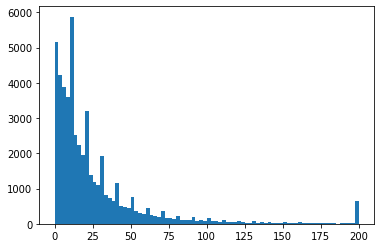

In [19]:
deg = [G.degree(n) for n in G.nodes()]
plt.hist(deg, bins=80)
plt.show()

# Part 3: PageRank

In [20]:
pr = nx.pagerank(G, alpha=1)

In [21]:
pr

{0: 0.00016841216029999824,
 1: 9.493728235631154e-05,
 2: 2.655207799019621e-05,
 3: 1.5022024975707986e-05,
 4: 3.3919270206629e-05,
 5: 2.3554494595987103e-05,
 6: 5.5735234485191674e-05,
 7: 1.1178269781237926e-05,
 8: 1.669234339374044e-05,
 9: 7.126746270239385e-06,
 10: 1.9061510188638365e-05,
 11: 2.947791198015251e-05,
 12: 3.819856470878889e-05,
 13: 4.6649147698503974e-05,
 14: 1.2395127497439517e-05,
 15: 7.620904493347773e-06,
 16: 3.369945626197854e-05,
 17: 3.661979856638462e-05,
 18: 1.609299120830718e-05,
 19: 0.00014716156753519097,
 20: 2.1428197905492862e-05,
 21: 2.5513331526291623e-05,
 22: 9.278712227666104e-06,
 23: 1.9941479002529734e-06,
 24: 1.640383359390426e-05,
 25: 1.9941479002529734e-06,
 26: 9.103269086848704e-06,
 27: 7.676894504942121e-06,
 28: 2.7551133566960417e-05,
 29: 1.4179335019436668e-05,
 30: 1.3037852508737761e-05,
 31: 4.335746033398535e-05,
 32: 3.784558293896139e-05,
 33: 8.639230743473866e-06,
 34: 9.58911820404471e-06,
 35: 1.9941479002

In [26]:
sorted(pr, key=pr.get)[-10:]

[24966, 3134, 7458, 7884, 13426, 25537, 45870, 20283, 26853, 46039]

# Part 4: Longest friendship path for 8942

In [24]:
shortest_path = nx.shortest_path_length(G, source=8942)

In [25]:
shortest_path

{8942: 0,
 8945: 1,
 8938: 1,
 8946: 1,
 8941: 1,
 8939: 2,
 8940: 2,
 8943: 2,
 8944: 2,
 35523: 3,
 21732: 3,
 47350: 3,
 13306: 3,
 27386: 3,
 40702: 3,
 26113: 4,
 8707: 4,
 23556: 4,
 13828: 4,
 2054: 4,
 28167: 4,
 6152: 4,
 12805: 4,
 26116: 4,
 26119: 4,
 7173: 4,
 22034: 4,
 8725: 4,
 13846: 4,
 46616: 4,
 13850: 4,
 6170: 4,
 26141: 4,
 13854: 4,
 26144: 4,
 31265: 4,
 26146: 4,
 6180: 4,
 23601: 4,
 43058: 4,
 6195: 4,
 5685: 4,
 43061: 4,
 23610: 4,
 6204: 4,
 13885: 4,
 35390: 4,
 4160: 4,
 576: 4,
 6209: 4,
 11843: 4,
 16452: 4,
 13893: 4,
 14918: 4,
 6215: 4,
 16456: 4,
 24129: 4,
 13898: 4,
 22603: 4,
 30275: 4,
 22606: 4,
 6222: 4,
 28241: 4,
 4181: 4,
 7254: 4,
 20565: 4,
 22617: 4,
 13914: 4,
 7262: 4,
 13924: 4,
 13925: 4,
 4198: 4,
 23655: 4,
 13934: 4,
 13941: 4,
 13430: 4,
 22646: 4,
 11897: 4,
 4223: 4,
 13956: 4,
 13958: 4,
 13961: 4,
 4240: 4,
 28316: 4,
 13982: 4,
 26279: 4,
 4264: 4,
 9386: 4,
 35503: 4,
 25264: 4,
 6320: 4,
 18110: 4,
 21694: 4,
 15552: 4,


In [27]:
longest_friendship = sorted(shortest_path, key=shortest_path.get)[-1]

longest friend is:

In [28]:
longest_friendship

18430

the lenght of this path is:

In [30]:
shortest_path[longest_friendship]

10

And the path is:

In [31]:
nx.shortest_path(G, source=8942, target=longest_friendship)

[8942, 8938, 8944, 13306, 17886, 29819, 14581, 14577, 14587, 18427, 18430]